In [2]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model


2024-08-21 22:40:24.703859: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-21 22:40:24.704331: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 22:40:24.706579: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-21 22:40:24.712661: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-21 22:40:24.722915: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

print("x_train shape: ", x_train.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape:  (60000, 28, 28)


In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# altura x largura x cor 
print(x_train.shape)

(60000, 28, 28, 1)


In [5]:
# vendo o numero de classes 
k = len(set(y_train))
k

10

In [6]:
# contruindo o modelo utilizando a API 
i = Input(shape = x_train[0].shape)
# camadas de convolução 
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)
x = Flatten()(x) # converte em vetor 
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(k, activation = 'softmax')(x)

model = Model(i, x)

I0000 00:00:1724290854.991815    8426 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-21 22:40:54.995902: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
# compilando e treinando a rede 
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7449 - loss: 0.7019 - val_accuracy: 0.8556 - val_loss: 0.3870
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8625 - loss: 0.3698 - val_accuracy: 0.8756 - val_loss: 0.3376
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8817 - loss: 0.3161 - val_accuracy: 0.8755 - val_loss: 0.3326
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8978 - loss: 0.2768 - val_accuracy: 0.8873 - val_loss: 0.3100
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9073 - loss: 0.2484 - val_accuracy: 0.8894 - val_loss: 0.2931
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9151 - loss: 0.2260 - val_accuracy: 0.8965 - val_loss: 0.2927
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9215 - loss: 0.2083 - val_accuracy: 0.8975 - val_loss: 0.3011
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9246 - loss: 0.1973 

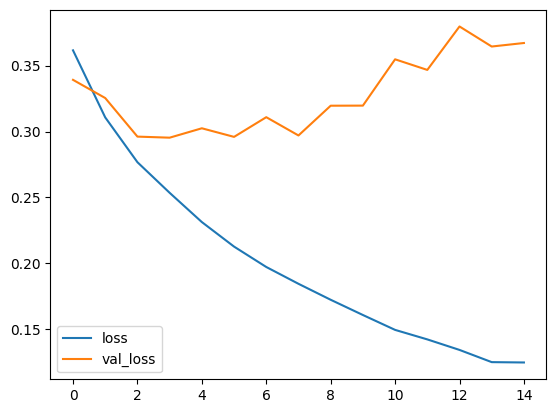

In [14]:
# grafico de perda por iteração 
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

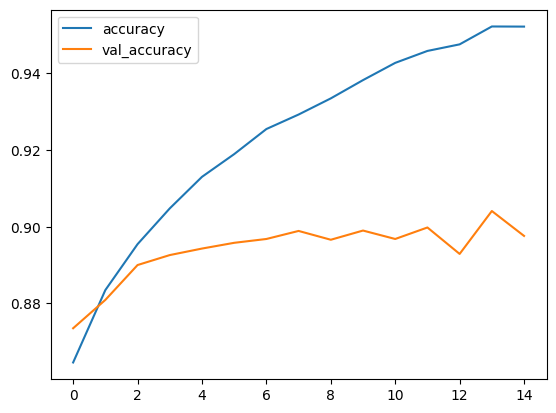

In [15]:
# grafico de precisão por iteração 
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix, without normalization 
[[875   0  21  19   4   1  68   0  12   0]
 [  4 969   1  15   4   0   4   0   3   0]
 [ 25   0 875   5  58   0  35   0   2   0]
 [ 15   5  20 873  45   0  39   0   3   0]
 [  1   0  71  15 868   0  44   0   1   0]
 [  0   1   0   1   0 976   0  13   1   8]
 [128   0  95  20 113   0 633   0  11   0]
 [  0   0   1   0   0  11   0 969   3  16]
 [  5   0   2   1   6   2   2   0 982   0]
 [  1   0   0   0   0   7   0  36   0 956]]


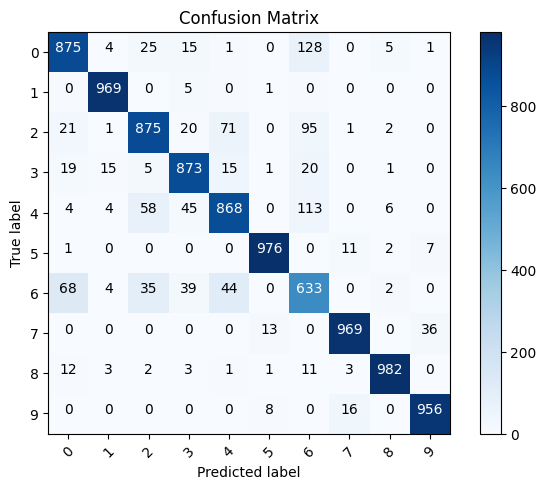

In [16]:
# imprimindo a matriz de confusão 
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization ")
        
    print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(i, j, format(cm[i, j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i, j] > thresh else "black")
            
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test) 
plot_confusion_matrix(cm, list(range(10)))       


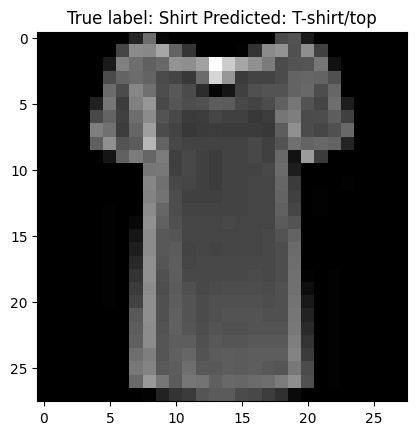

In [17]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandall
Shirt
Sneaker
Bag
Ankle boot'''.split()

minclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(minclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap= 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

2024-08-23 12:47:18.910631: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 12:47:19.026130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 12:47:19.074881: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 12:47:19.087939: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-23 12:47:19.170574: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# carregando e normalizando os dados 
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [3]:
#num classes
K = len(np.unique(y_train))
K


10

In [5]:

#criando a rede neural através da API funcional

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu')(i)
x = Conv2D(64, (3,3), activation='relu')(x)
x = Conv2D(128, (3,3), activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

I0000 00:00:1724428056.920050    4138 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724428056.922962    4138 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724428056.925377    4138 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724428057.026097    4138 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [6]:
# compilando a rede 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# treinando a rede 
r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15


I0000 00:00:1724428063.222329    4356 service.cc:146] XLA service 0x7337500039a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724428063.222351    4356 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-08-23 12:47:43.256686: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-23 12:47:43.426509: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


  11/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.1181 - loss: 3.1206

I0000 00:00:1724428066.447175    4356 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.4041 - loss: 1.6649 - val_accuracy: 0.6132 - val_loss: 1.0725
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6387 - loss: 1.0247 - val_accuracy: 0.6616 - val_loss: 0.9661
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7305 - loss: 0.7755 - val_accuracy: 0.6893 - val_loss: 0.9019
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.7992 - loss: 0.5728 - val_accuracy: 0.6900 - val_loss: 0.9439
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8551 - loss: 0.4123 - val_accuracy: 0.7092 - val_loss: 0.9080
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.8922 - loss: 0.3078 - val_accuracy: 0.7152 - val_loss: 1.0145
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.9159 - loss: 0.2435 - val_accuracy: 0.7053 - val_loss: 1.1528
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.9329 - loss: 0.19

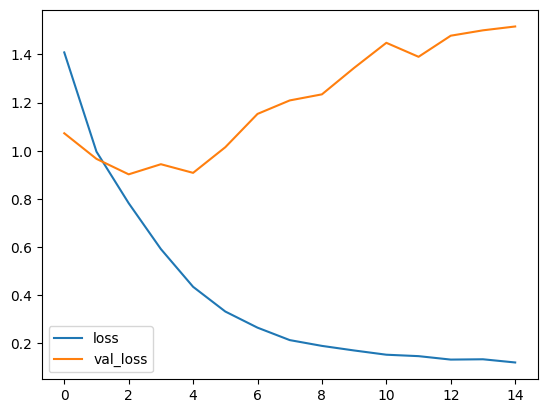

In [7]:
# exibindo a perda por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

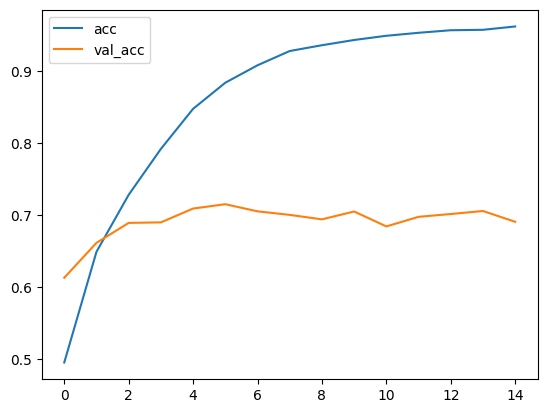

In [8]:
# exibindo a acurácia por iteração
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
# exibir a matriz de confusão com gráfico
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix
[[715  30  36  17  18  13   6  19 113  33]
 [  6 893   2   5   5   7   8   4  29  41]
 [ 73   9 481  83  98  96  60  54  37   9]
 [ 30  28  46 454  56 261  45  43  15  22]
 [ 16   7  56  80 611  61  47 110  10   2]
 [ 15   6  27 166  44 631  21  71   9  10]
 [  7  11  30  70  31  59 758  11  13  10]
 [ 11   7  20  45  38  73   8 769   6  23]
 [ 39  54   5  13   4   5   3  10 845  22]
 [ 27 129   7  17   5  13   2  18  31 751]]


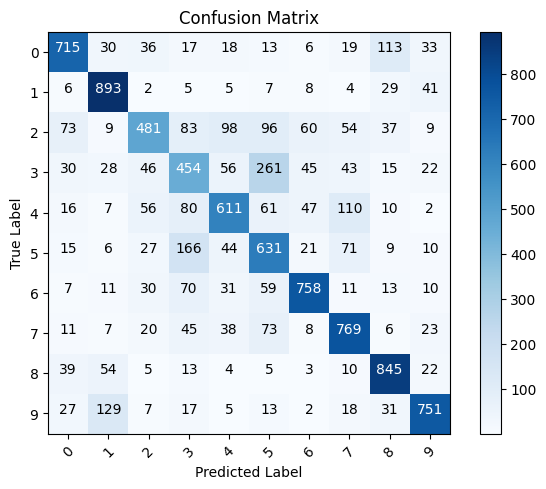

In [20]:
# exibir a matriz de confusão
p_teste = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_teste)
plot_confusion_matrix(cm, list(range(10)))

In [21]:
# mapeando os rotulos 
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: airplane Predicted: ship')

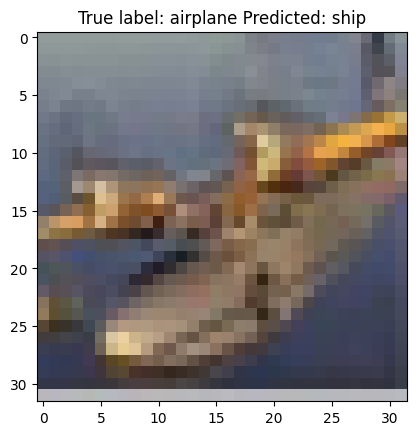

In [24]:
# exbindo exemplo mal classificado 
misclassified_idx = np.where(p_teste != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_teste[i]]))

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model 

In [3]:
# carregando e normalizando o data set 
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000,))

In [4]:
# numero de classes 
K = len(set(y_train))
K

10

In [6]:
#criando a rede neural através da API funcional

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)

x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i,x)

I0000 00:00:1724456082.156048    4105 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724456082.359015    4105 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724456082.361662    4105 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1724456082.365690    4105 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [7]:
# compilando a rede 
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [10]:
# fit usando data argumentation 
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=10)

Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7796 - loss: 0.6381 - val_accuracy: 0.7940 - val_loss: 0.6330
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 336us/step - accuracy: 0.8125 - loss: 0.4695 - val_accuracy: 0.7937 - val_loss: 0.6353
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8027 - loss: 0.5817 - val_accuracy: 0.8198 - val_loss: 0.5366
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 330us/step - accuracy: 0.7812 - loss: 0.5539 - val_accuracy: 0.8211 - val_loss: 0.5329
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8141 - loss: 0.5507 - val_accuracy: 0.7884 - val_loss: 0.6044
Epoch 6/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8438 - loss: 0.3079

2024-08-23 20:40:43.047107: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step - accuracy: 0.8438 - loss: 0.3079 - val_accuracy: 0.7885 - val_loss: 0.6019
Epoch 7/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8202 - loss: 0.5304 - val_accuracy: 0.8002 - val_loss: 0.6120
Epoch 8/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 345us/step - accuracy: 0.8438 - loss: 0.5932 - val_accuracy: 0.8071 - val_loss: 0.5924
Epoch 9/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8349 - loss: 0.4869 - val_accuracy: 0.8292 - val_loss: 0.5195
Epoch 10/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 1s 348us/step - accuracy: 0.9062 - loss: 0.3784 - val_accuracy: 0.8281 - val_loss: 0.5208


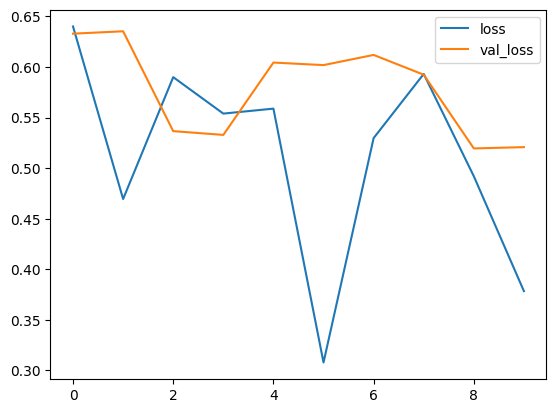

In [11]:
# exibindo a perda por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

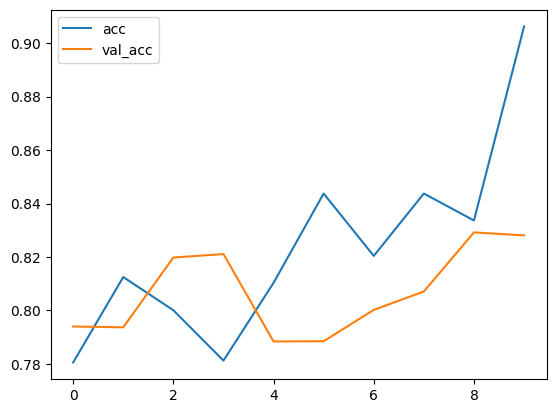

In [12]:
# exibindo a acurácia por iteração
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [13]:
# exibir a matriz de confusão com gráfico
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix
[[819   6  12  20  19   3  13  10  63  35]
 [  3 919   0   5   2   0   4   0  17  50]
 [ 51   0 601  66  66  47 129  25   6   9]
 [  8   3  11 719  48  64  99  26  12  10]
 [  7   1  15  29 795   9  92  49   3   0]
 [  4   0   7 139  34 708  54  47   3   4]
 [  4   0   7  29   4   3 946   3   3   1]
 [  8   0   2  32  18  20  11 903   1   5]
 [ 19   6   1   5   1   1   7   2 942  16]
 [  9  32   2   5   0   2   1   6  14 929]]


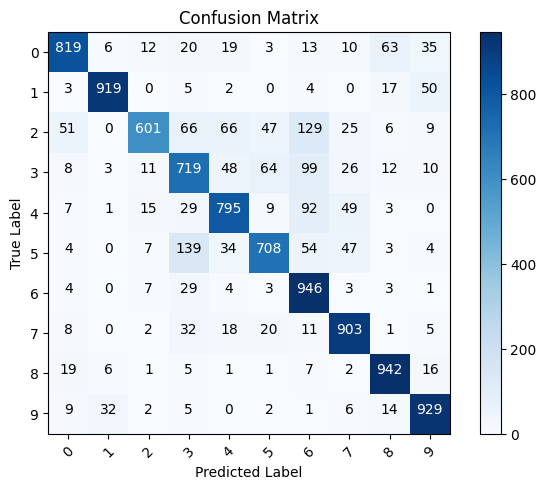

In [15]:
# exibindo a matriz de confusão
p_teste = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_teste)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: dog Predicted: cat')

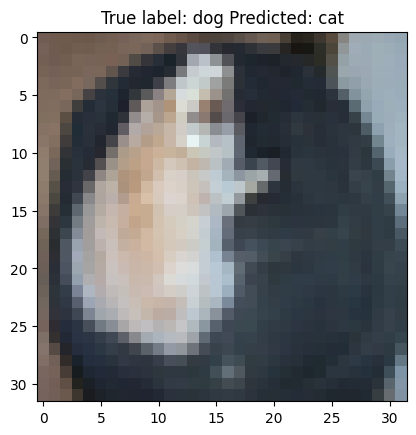

In [16]:
# mapeando os rotulos 
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# exbindo exemplo mal classificado 
misclassified_idx = np.where(p_teste != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_teste[i]]))

In [17]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,189,888 (27.43 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 4,792,662 (18.28 MB)

### text 

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [20]:
sentences = [
    "Quero uma porsche GT3 RS.",
    "Flamengo maior que o palmeiras.",
    "Deus, pátria e família."
]

In [21]:
# mudando as palavras para numeros inteiros 
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14]]


In [22]:
# valor numerico de cada palavra 
tokenizer.word_index

{'quero': 1,
 'uma': 2,
 'porsche': 3,
 'gt3': 4,
 'rs': 5,
 'flamengo': 6,
 'maior': 7,
 'que': 8,
 'o': 9,
 'palmeiras': 10,
 'deus': 11,
 'pátria': 12,
 'e': 13,
 'família': 14}

In [23]:
# padding
data = pad_sequences(sequences)
print(data)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 0 11 12 13 14]]


In [28]:
MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH)
print(data)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [ 0 11 12 13 14]]


In [29]:
# padding
data = pad_sequences(sequences, maxlen = MAX_SEQUENCE_LENGTH, padding='post')
print(data)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14  0]]


In [25]:
# truncando 
data = pad_sequences(sequences, maxlen=3)
print(data)

[[ 3  4  5]
 [ 8  9 10]
 [12 13 14]]


In [26]:
data = pad_sequences(sequences, maxlen=3, truncating='post')
print(data)

[[ 1  2  3]
 [ 6  7  8]
 [11 12 13]]


### Spam

In [31]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

In [34]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1') #criando o dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [35]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1) # removendo os dados desnecessarios
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
df.columns = ['labels', 'data'] # renomeando colunas
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
# 0 para ham e 1 para spam
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
Y = df['b_labels'].values

In [40]:
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33) # dividindo treino e teste

In [41]:
# convertendo os dados (sentença para sequencia)
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [43]:
# mapeando palavras únicas
word2idx = tokenizer.word_index
V= len(word2idx)
V # exibindo a quantidade de palavras unicas

7251

In [47]:
# padronizando as sequências
data_train = pad_sequences(sequences_train)
print(data_train.shape)
T = data_train.shape[1]

data_test = pad_sequences(sequences_test, maxlen=T)
print(data_test.shape)

(3733, 151)
(1839, 151)


In [48]:
# rede neural
D = 20

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [49]:
#compilando e treinando

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

r = model.fit(data_train, Ytrain, epochs=10, validation_data=(data_test, Ytest))

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8663 - loss: 0.4595 - val_accuracy: 0.8804 - val_loss: 0.2859
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9303 - loss: 0.2012 - val_accuracy: 0.9598 - val_loss: 0.1394
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9791 - loss: 0.0804 - val_accuracy: 0.9652 - val_loss: 0.1328
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9842 - loss: 0.0718 - val_accuracy: 0.9690 - val_loss: 0.1207
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9899 - loss: 0.0517 - val_accuracy: 0.9701 - val_loss: 0.1512
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9913 - loss: 0.0449 - val_accuracy: 0.9690 - val_loss: 0.1279
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9932 - loss: 0.0360 - val_accuracy: 0.9701 - val_loss: 0.1427
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9907 - loss: 0.0443 - val_accuracy: 0

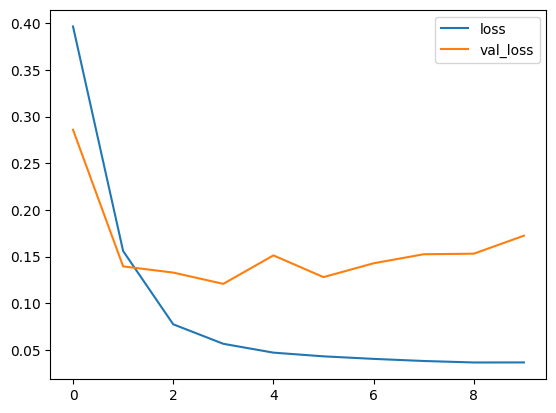

In [50]:
# exibindo a perda por iteração
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

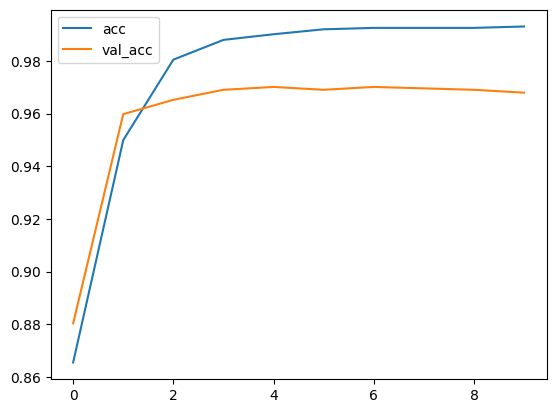

In [51]:
# exibindo a acurácia por iteração
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()